In this excercise, you will be building a machine learning model that detects based on image analysis if the banknote is authentic or forged. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. Wavelet Transform tool were used to extract features from images and those are the features you will be using in the model.

The columns in the dataset are

1. variance: variance of Wavelet Transformed image (continuous)
2. skewness: skewness of Wavelet Transformed image (continuous)
3. curtosis: curtosis of Wavelet Transformed image (continuous)
4. entropyentropy of image (continuous)
5. class: class, one means forged and zero means authentic 

# Data Analysis
First load the dataset `BankNote_Authentication.csv`. Find out the mean and the varience for each of the features in the datase

In [96]:
# Import libraries needed
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
data= pd.read_csv('BankNote_Authentication.csv')

# Let's see what we have in dataset 
data.describe().T
data.isna().sum() # num of NA's in data
print("Data Shape:", data.shape)
data.head(10)
print("Mean of features")
data.mean()
print("Variance of features")
data.var()
data.shape

,count,mean,std,min,25%,50%,75%,max
variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

Data Shape: (1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


Mean of features


variance    0.433735
skewness    1.922353
curtosis    1.397627
entropy    -1.191657
class       0.444606
dtype: float64

Variance of features


variance     8.081299
skewness    34.445710
curtosis    18.576359
entropy      4.414256
class        0.247112
dtype: float64

(1372, 5)

In [98]:
print('Total images in our data set:',data['class'].count())
forged_yes= (data["class"] == 1).sum()
forged_yes.sum()
authentic = (data['class']==0).sum()
authentic.sum()
print('Number of images that were forged:',forged_yes.sum() )
print('Percentage of forged Bank Notes:', forged_yes / data['class'].count() )
# Yes, this is an imbalanced data set as we do not have a 50/50 ratio. However, it is not that imbalanced. 

Total images in our data set: 1372


610

762

Number of images that were forged: 610
Percentage of forged Bank Notes: 0.4446064139941691


<AxesSubplot:xlabel='class'>

<Figure size 432x288 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

array([[<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>],
       [<AxesSubplot:title={'center':'skewness'}>,
        <AxesSubplot:title={'center':'variance'}>, <AxesSubplot:>]],
      dtype=object)

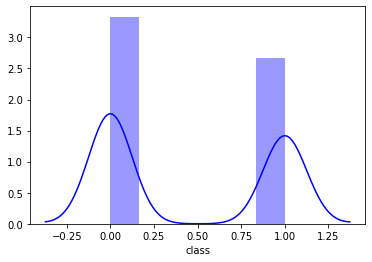

<Figure size 432x288 with 0 Axes>

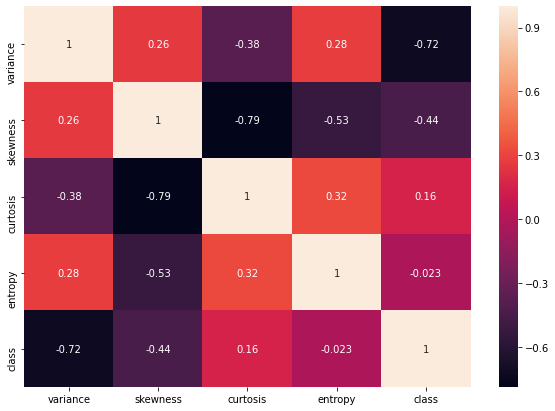

<Figure size 432x288 with 0 Axes>

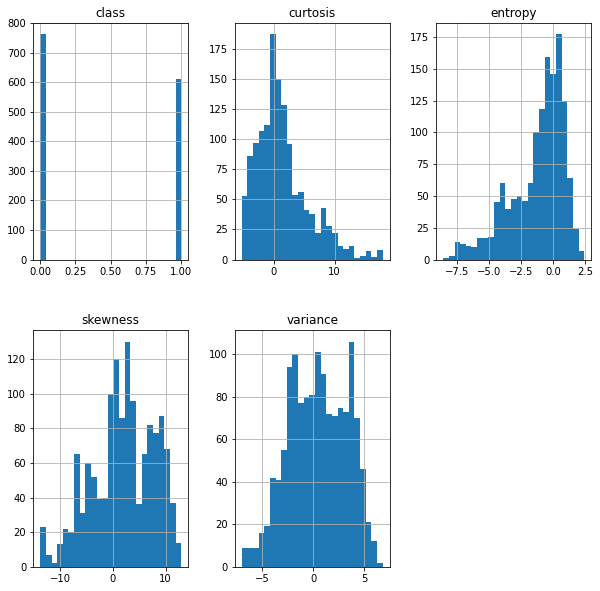

In [99]:
sns.distplot(data['class'], color = "blue", kde = True)
plt.figure()
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot= True)
plt.figure()
data.hist(bins = 25, figsize = (10, 10), layout = (2,3))

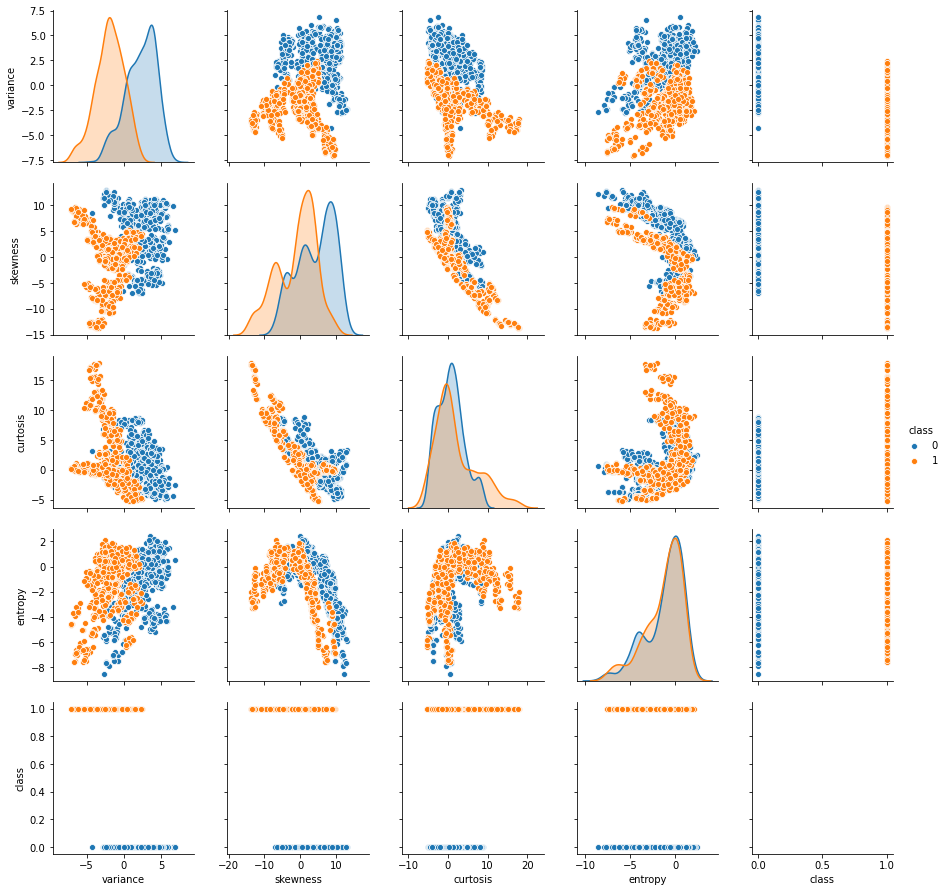

In [100]:
sns.pairplot(data, hue= "class")

Find the mean and the variance for each of the features.

In [101]:
print("Mean of features")
data.mean()
print("Variance of features")
data.var()

# Yes there are big differences. The big differences take place when we examine the skewness and the
# curtosis of the data set. Curstosis and skewness inform us that there is a large variation between 
# the data set. 

Mean of features


variance    0.433735
skewness    1.922353
curtosis    1.397627
entropy    -1.191657
class       0.444606
dtype: float64

Variance of features


variance     8.081299
skewness    34.445710
curtosis    18.576359
entropy      4.414256
class        0.247112
dtype: float64

(array([ 17.,  15.,  32.,  76.,  90., 140.,  98.,  74.,  51.,  17.]),
 array([-7.0421 , -6.09872, -5.15534, -4.21196, -3.26858, -2.3252 ,
        -1.38182, -0.43844,  0.50494,  1.44832,  2.3917 ]),
 <BarContainer object of 10 artists>)

(array([  1.,  22.,  42.,  50., 120., 123., 146., 176.,  68.,  14.]),
 array([-4.2859 , -3.17483, -2.06376, -0.95269,  0.15838,  1.26945,
         2.38052,  3.49159,  4.60266,  5.71373,  6.8248 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

(array([ 30.,  25.,  59.,  69.,  20., 109., 105., 148.,  22.,  23.]),
 array([-13.7731 , -11.43565,  -9.0982 ,  -6.76075,  -4.4233 ,  -2.08585,
          0.2516 ,   2.58905,   4.9265 ,   7.26395,   9.6014 ]),
 <BarContainer object of 10 artists>)

(array([ 23.,  84.,  31.,  92.,  82.,  50., 103., 124., 134.,  39.]),
 array([-6.9321 , -4.94373, -2.95536, -0.96699,  1.02138,  3.00975,
         4.99812,  6.98649,  8.97486, 10.96323, 12.9516 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

(array([ 85., 108., 181.,  54.,  51.,  31.,  54.,  25.,   7.,  14.]),
 array([-5.2861 , -2.96475, -0.6434 ,  1.67795,  3.9993 ,  6.32065,
         8.642  , 10.96335, 13.2847 , 15.60605, 17.9274 ]),
 <BarContainer object of 10 artists>)

(array([ 71.,  92.,  90., 113., 133., 111.,  65.,  30.,  18.,  39.]),
 array([-4.9417 , -3.56459, -2.18748, -0.81037,  0.56674,  1.94385,
         3.32096,  4.69807,  6.07518,  7.45229,  8.8294 ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

(array([ 17.,  16.,  13.,  37.,  51.,  58.,  99., 149., 137.,  33.]),
 array([-7.5887, -6.6163, -5.6439, -4.6715, -3.6991, -2.7267, -1.7543,
        -0.7819,  0.1905,  1.1629,  2.1353]),
 <BarContainer object of 10 artists>)

(array([ 11.,   7.,  19.,  53.,  69.,  49., 123., 199., 197.,  35.]),
 array([-8.5482 , -7.44843, -6.34866, -5.24889, -4.14912, -3.04935,
        -1.94958, -0.84981,  0.24996,  1.34973,  2.4495 ]),
 <BarContainer object of 10 artists>)

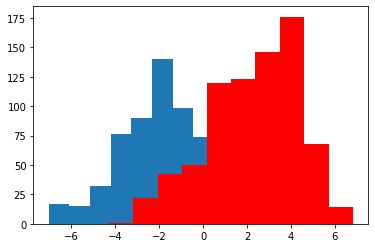

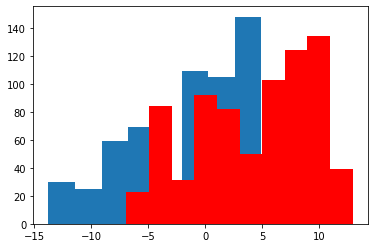

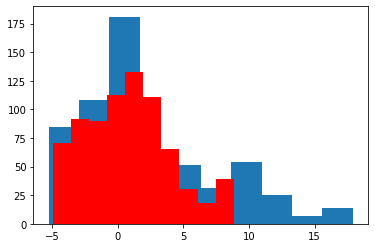

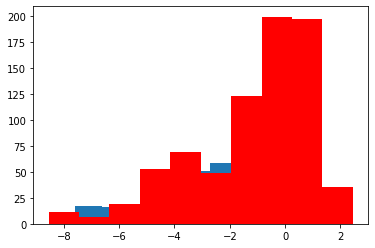

In [102]:
# we will plot both forged and not in the same graph to see the distribution
# Variance
plt.hist(data.variance[data['class']==1])
plt.hist(data.variance[data['class']==0], color='r')
plt.figure()
# Skewness
plt.hist(data.skewness[data['class']==1])
plt.hist(data.skewness[data['class']==0], color='r')
plt.figure()
# Curtosis
plt.hist(data.curtosis[data['class']==1])
plt.hist(data.curtosis[data['class']==0], color='r')
plt.figure()
# Entropy
plt.hist(data.entropy[data['class']==1])
plt.hist(data.entropy[data['class']==0], color='r')

The above graphs shows us that there is a clear separation between the forged and not forged. We can see that separation as the histograms are more skewed the the right, therefore, they are more forged than authentic. 

## Machine Learning

In [103]:
# Splitting the dataset for ML
# Let's split the data 75% train w/ 25% test

from sklearn.model_selection import train_test_split 
X = data.loc[:,data.columns != 'class'] # selecting everything except for class # independent variables
Y = data['class'] # class is our dependent variable
X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=Y, random_state = 66, test_size = 0.25)

### Logistic Regression

Build and train an ML model that can predict based on the image charachteristics if the banknote is authentic or forged

In [104]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

What is the training and test accuracy for the model?

In [105]:
train_score = logreg.score(X_train, y_train)
test_score = logreg.score(X_test, y_test)
print('My training accuracy is', train_score)
print('My testing accuracy is', test_score)

My training accuracy is 0.9922254616132167
My testing accuracy is 0.9854227405247813


What are the coefficients and Bias?

In [106]:
logreg.coef_
logreg.intercept_

array([[-2.71526822, -1.68283517, -1.95247171, -0.18543526]])

array([3.08847133])

Plot the precision and recall curve for the test data. Which threshold (or range of thresholds) should we operate on to get the best F1 score and what is the best F1 Score?

0.9934782608695653

The best F1 score for our test data is  0.9933774834437086


The best F1 score for training data is 0.9934782608695653


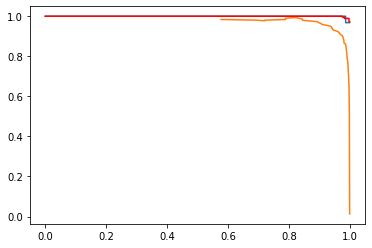

In [107]:
prob_test = logreg.predict_proba(X_test)
precision, recall, th = metrics.precision_recall_curve(y_test, prob_test[:,1])
plt.plot(recall, precision)

prob_train = logreg.predict_proba(X_train)
prec, rec, _ = metrics.precision_recall_curve(y_train, prob_train[:,1])
plt.plot(rec, prec, color='r')

F1= 2*precision*recall / (precision + recall)
#F1
F1_train = 2*prec*rec/ (prec+ rec)
F1_train.max()
print("The best F1 score for our test data is ", F1.max())
plt.plot(th, F1[:-1])
print('The best F1 score for training data is',F1_train.max() )

What is the training and test accuracy using the threshold obtained above?

In [108]:
print("The best F1 score is", F1.max())
print('The best F1 score for training data is',F1_train.max() )

The best F1 score is 0.9933774834437086
The best F1 score for training data is 0.9934782608695653


Plot the RoC curve and calculate the area under the curve for the test data

0.9996555524938

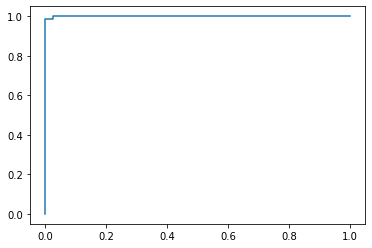

In [109]:
fpr, tpr,_  = metrics.roc_curve(y_test, prob_test[:,1])
plt.plot(fpr, tpr)
metrics.auc(fpr,tpr)

Plot a scatter diagram for the probability of being positive as done in Lec 4 for the test data and color the points based on the actual class 

Text(0.5, 1.0, 'Prob predictions of logistic regression of being forged')

Text(0, 0.5, 'Actual Values')

Text(0.5, 0, 'Prediction Probabilities')

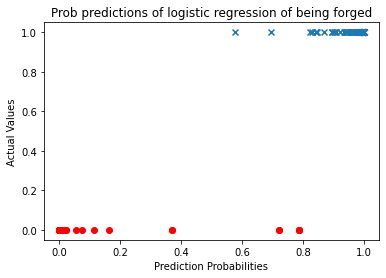

In [110]:
prob_test = logreg.predict_proba(X_test)
plt.scatter( prob_test[y_test==1,1], y_test[y_test==1], marker="x")
plt.scatter( prob_test[y_test==0,1], y_test[y_test==0], c="r", marker = "o")
plt.title('Prob predictions of logistic regression of being forged')
plt.ylabel('Actual Values')
plt.xlabel('Prediction Probabilities')

## Decision Trees

In [111]:
# single Decision Tree
X_train, X_test, y_train, y_test
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

(      variance  skewness  curtosis   entropy
 521    0.81356   9.15660  -2.14920 -4.181400
 1053  -0.83535   0.80494  -1.64110 -0.192250
 603    3.76350   2.78110   0.66119  0.341790
 1000  -2.88290   3.89640  -0.18880 -1.167200
 799   -3.22380   2.79350   0.32274 -0.860780
 ...        ...       ...       ...       ...
 359   -2.32420  11.51760   1.82310 -5.375000
 1077  -1.60010  -9.58280   9.40440  0.081882
 1248  -4.19580  -8.18190  12.12910 -1.601700
 1308  -4.63380 -12.75090  16.71660 -3.216800
 175    3.58300  -3.79710   3.43910 -0.125010
 
 [1029 rows x 4 columns],       variance  skewness  curtosis  entropy
 1235   -3.5359   0.30417   0.65690 -0.29570
 127     3.7818  -2.88460   2.25580 -0.15734
 361     3.3848   3.26740   0.90967  0.25128
 133     0.4339   5.53950   2.03300 -0.40432
 163     2.4008   9.35930  -3.35650 -3.35260
 ...        ...       ...       ...      ...
 566     2.6415   7.58600  -0.28562 -1.66770
 878    -3.2854   4.03720  -0.45356 -1.82280
 693     1.5478 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [112]:
# Prediction and Evaluation
predict = dtree.predict(X_test)
predict

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [113]:
from sklearn.metrics import precision_recall_fscore_support,classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       191
           1       0.98      0.99      0.98       152

    accuracy                           0.99       343
   macro avg       0.98      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

[[188   3]
 [  2 150]]


array([0.55752686, 0.27218476, 0.14802394, 0.02226445])

<BarContainer object of 4 artists>

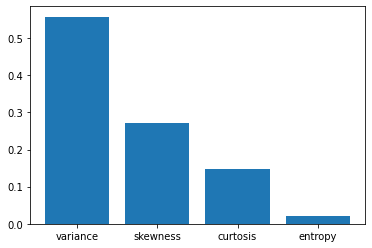

In [114]:
dtree.feature_importances_
plt.bar(X.columns, dtree.feature_importances_)
# Variance is the most imporant feature for this dataset

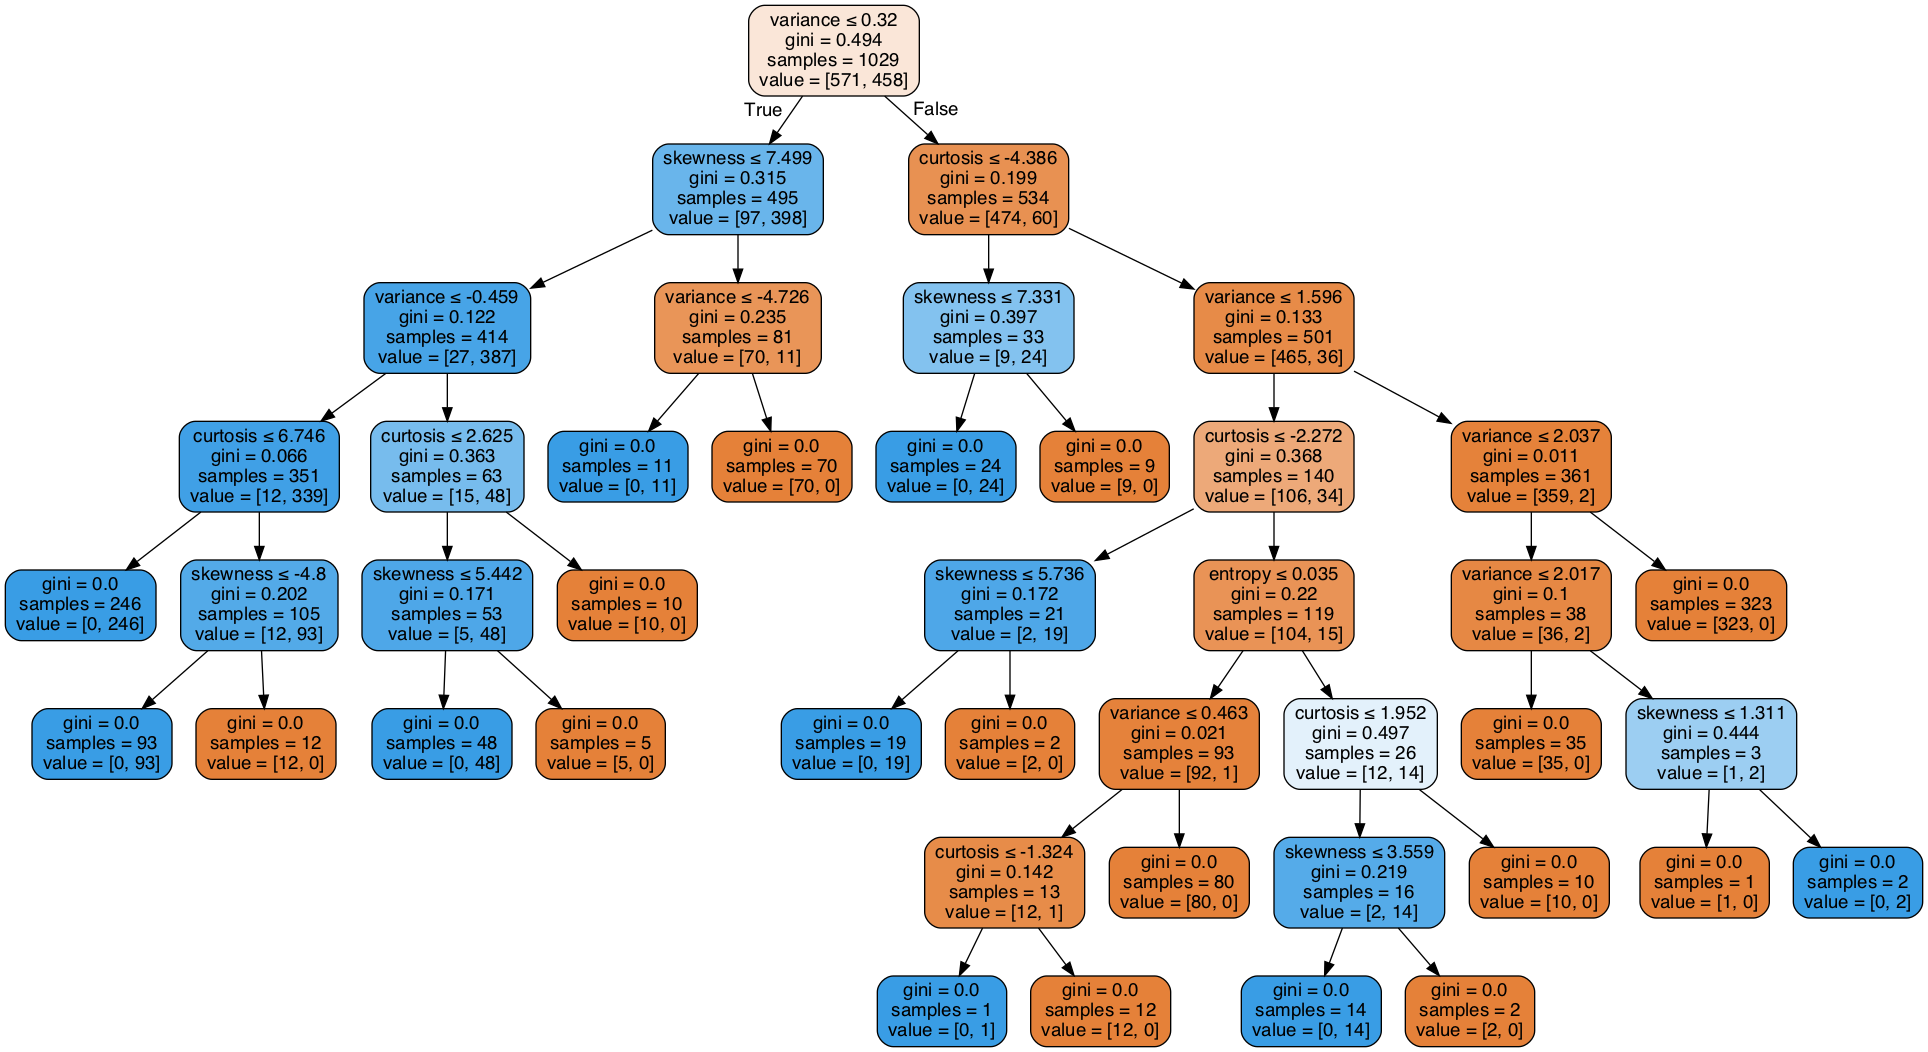

In [122]:
# Let's graph the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Ramdom Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) 
# creating 100 different trees 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [118]:
rfc.predict_proba(X_test) #the probability of the image being a Forged or authentic

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.09, 0.91],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.03, 0.97],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.06, 0.94],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.24, 0.76],
       [0.95, 0.05],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.98, 0.02],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.13, 0.87],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  ,

In [119]:
print(confusion_matrix(y_test, rfc_pred))

[[190   1]
 [  0 152]]


In [120]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       191
           1       0.99      1.00      1.00       152

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



Decision Tree [0.55752686 0.27218476 0.14802394 0.02226445]
Random Forest Classifier [0.51583643 0.26886153 0.15497408 0.06032796]


<BarContainer object of 4 artists>

<Figure size 432x288 with 0 Axes>

<BarContainer object of 4 artists>

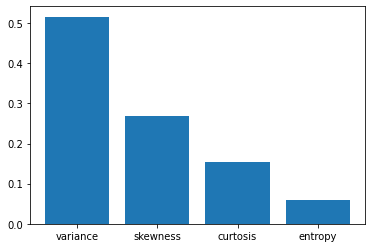

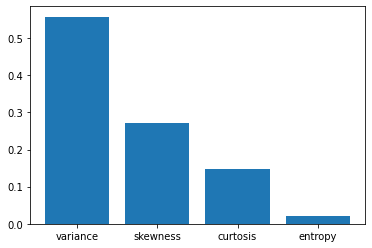

In [121]:
print("Decision Tree", dtree.feature_importances_)
print("Random Forest Classifier", rfc.feature_importances_)
plt.bar(X.columns, rfc.feature_importances_)
plt.figure()
plt.bar(X.columns, dtree.feature_importances_)